In [91]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
plt.rc("font", size = 14)
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import seaborn as sns
sns.set(style = "white")
sns.set(style = "whitegrid", color_codes = True)
from sklearn.model_selection import train_test_split

In [93]:
loan_status = loan_status.dropna()

In [94]:
print(list(loan_status.columns))

['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term', 'Credit Score', 'Annual Income', 'Years in current job', 'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History', 'Months since last delinquent', 'Number of Open Accounts', 'Number of Credit Problems', 'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies', 'Tax Liens']


In [95]:
loan_status.shape

(36423, 19)

In [96]:
loan_status['Loan Status'].value_counts()

Fully Paid     28972
Charged Off     7451
Name: Loan Status, dtype: int64

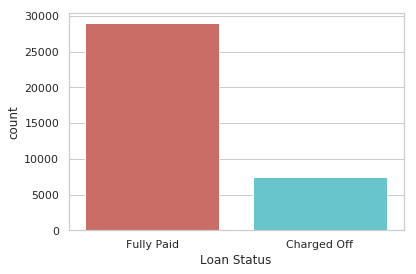

<Figure size 432x288 with 0 Axes>

In [97]:
sns.countplot(x='Loan Status', data=loan_status, palette = 'hls')
plt.show()
plt.savefig('countplot')

In [98]:
print("Response rate----")
print(loan_status['Loan Status'].value_counts()/loan_status.shape[0]*100)

Response rate----
Fully Paid     79.543146
Charged Off    20.456854
Name: Loan Status, dtype: float64


In [99]:
loan_status.groupby('Loan Status').mean()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
Loan Status,,,,,,,,,,,,
Charged Off,3.321841e+05,2380.595222,1.354186e+06,19659.305584,18.659012,34.151657,11.740438,0.192189,258278.541270,586924.999597,0.112602,0.046168
Fully Paid,1.723323e+07,714.950366,1.492947e+06,19168.937701,19.169412,35.031306,11.426619,0.184454,265001.323485,685256.909706,0.115353,0.036622


In [100]:
loan_status.groupby('Customer ID').mean()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
Customer ID,,,,,,,,,,,,
0002005f-3575-462e-bb81-714530e8e752,140844.0,736.0,1520456.0,25340.87,35.6,43.0,14.0,1.0,135755.0,451704.0,1.0,0.0
000685bc-92e8-44ca-9943-7668d3efc988,216546.0,735.0,1869581.0,25862.42,33.2,16.0,18.0,0.0,86526.0,544544.0,0.0,0.0
000ae2e0-788e-4b49-b861-5e241a68d5d4,64504.0,730.0,891385.0,21467.53,18.4,40.0,14.0,1.0,103208.0,247434.0,1.0,0.0
000d6327-c459-4bd5-bc1b-4437b366b719,222948.0,686.0,946200.0,13325.65,29.7,11.0,14.0,0.0,585295.0,2244088.0,0.0,0.0
000e1ab7-41d9-46a0-be1c-21f81721a040,173382.0,746.0,1703236.0,23845.38,15.6,42.0,8.0,0.0,350322.0,574552.0,0.0,0.0
000f9236-4a3c-4384-97fc-80f3b601009a,195602.0,729.0,1088662.0,6377.73,28.6,32.0,9.0,0.0,255341.0,579744.0,0.0,0.0
00127cca-7050-4867-9410-8249ef8ad4d2,343464.0,720.0,1140912.0,9431.60,19.8,30.0,8.0,0.0,48032.0,617958.0,0.0,0.0
00132610-2f2f-4aeb-a371-2d66aca1248e,50144011.5,697.0,1243778.0,12002.30,19.7,10.0,9.0,0.0,40736.0,130680.0,0.0,0.0
0014830b-6ced-4466-9bca-65b788662bc9,764302.0,739.0,1941420.0,37210.55,18.2,33.0,16.0,0.0,439679.0,1298704.0,0.0,0.0


In [101]:
loan_status.groupby('Loan ID').mean()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
Loan ID,,,,,,,,,,,,
00069ff1-a877-4d35-81be-7cd359b99956,31526.0,716.0,2065965.0,49927.44,15.1,5.0,22.0,0.0,526414.0,1090386.0,0.0,0.0
000a0abe-b839-414d-9b00-8ba33b47ebce,77176.0,736.0,1618629.0,7229.88,28.6,2.0,6.0,0.0,221217.0,560472.0,0.0,0.0
000c0c27-1961-4336-b760-a300e1bce9b0,142186.0,7320.0,479712.0,12032.51,19.9,74.0,9.0,0.0,152475.0,534974.0,0.0,0.0
000dada0-f2a3-4d6d-b9d2-284939e7cc7d,99999999.0,740.0,1599629.0,22661.49,21.1,16.0,22.0,0.0,226556.0,406076.0,0.0,0.0
0010c319-7142-47c3-8a68-57e45f54c000,325688.0,744.0,1181325.0,18507.33,12.9,38.0,10.0,0.0,194617.0,338888.0,0.0,0.0
001312a5-ed3c-4930-9525-4d09c55ba7f4,50381347.5,705.0,2070145.0,16785.55,23.6,54.0,10.0,1.0,169214.0,473242.0,1.0,0.0
00154692-9700-48a8-b0eb-06848300f044,130592.0,736.0,1355270.0,15359.60,18.2,40.0,12.0,0.0,262865.0,338558.0,0.0,0.0
00172630-8645-4ce4-aa0e-38f0ce920ec9,267388.0,746.0,3078912.0,18935.40,21.8,52.0,9.0,0.0,121999.0,1103630.0,0.0,0.0
0018f629-8cef-48bd-bb93-40179f24256c,66396.0,711.0,535192.0,9142.80,15.8,50.0,8.0,0.0,112347.0,307538.0,0.0,0.0


In [102]:
loan_status.groupby('Current Loan Amount').mean()

,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
Current Loan Amount,,,,,,,,,,,
21450.0,694.000000,1.132381e+06,21987.180000,27.200000,3.000000,12.000000,0.000000,3.395110e+05,5.688980e+05,0.000000,0.000000
21472.0,2389.000000,1.112735e+06,21187.850000,22.350000,36.250000,11.250000,0.000000,4.462102e+05,8.371880e+05,0.000000,0.000000
21516.0,686.000000,1.040915e+06,23247.070000,14.100000,56.000000,14.000000,0.000000,2.627320e+05,5.592180e+05,0.000000,0.000000
21538.0,679.000000,1.301405e+06,16809.870000,19.200000,23.000000,9.000000,0.000000,2.041550e+05,2.841080e+05,0.000000,0.000000
21582.0,728.666667,1.105882e+06,23560.000000,23.133333,15.666667,8.666667,0.000000,9.609567e+04,2.758287e+05,0.000000,0.000000
21648.0,6820.000000,8.130860e+05,13656.630000,34.600000,7.000000,13.000000,0.000000,4.772135e+05,8.135600e+05,0.000000,0.000000
21670.0,690.800000,8.526858e+05,13009.794000,16.260000,25.200000,11.200000,0.000000,4.858680e+04,2.217952e+05,0.000000,0.000000
21714.0,714.000000,1.822423e+06,41763.900000,24.600000,46.000000,8.000000,0.000000,8.514090e+05,9.722240e+05,0.000000,0.000000
21736.0,716.500000,1.717125e+06,25693.415000,17.800000,21.000000,11.000000,0.000000,3.228005e+05,4.737260e+05,0.000000,0.000000


In [103]:
loan_status.groupby('Term').mean()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
Term,,,,,,,,,,,,
Long Term,9.733440e+06,1144.196726,1.599553e+06,21796.504878,19.364345,34.410579,12.006529,0.164932,311199.493376,693001.097086,0.098600,0.036715
Short Term,1.542809e+07,1019.512125,1.409384e+06,18236.259348,18.942646,35.031522,11.280023,0.194663,244180.835776,653753.849004,0.121408,0.039335


In [104]:
loan_status.groupby('Credit Score').mean()

,Current Loan Amount,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
Credit Score,,,,,,,,,,,
585.0,5.990490e+05,4.210790e+06,42044.720000,28.250000,34.750000,12.000000,0.000000,1.793410e+06,3.480856e+06,0.000000,0.000000
587.0,2.149224e+05,1.615802e+06,18223.394000,15.080000,31.200000,8.800000,0.000000,9.168260e+04,1.764796e+05,0.000000,0.000000
588.0,1.042232e+07,1.956253e+06,28630.188000,19.270000,34.600000,15.200000,0.200000,3.121795e+05,5.552338e+05,0.200000,0.000000
589.0,7.139660e+05,1.814092e+06,21013.620000,19.650000,15.500000,13.500000,0.000000,1.251929e+06,1.765742e+06,0.000000,0.000000
590.0,1.464101e+07,2.107019e+06,18587.808571,14.400000,31.000000,8.857143,0.285714,2.160761e+05,4.226326e+05,0.285714,0.000000
591.0,2.037323e+07,1.743136e+06,13551.636000,19.040000,31.400000,8.000000,0.200000,1.363326e+05,2.222616e+05,0.000000,0.200000
592.0,4.531413e+05,1.545232e+06,22987.340000,22.366667,36.333333,8.666667,0.000000,5.356543e+05,6.847133e+05,0.000000,0.000000
593.0,4.676364e+05,1.275481e+06,31532.628000,13.860000,32.200000,13.400000,0.400000,2.807326e+05,5.799552e+05,0.200000,0.200000
594.0,2.542794e+07,2.053530e+06,25693.700000,20.600000,33.250000,12.250000,0.250000,4.031468e+05,6.970975e+05,0.250000,0.000000


In [105]:
loan_status.groupby('Annual Income').mean()

,Current Loan Amount,Credit Score,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
Annual Income,,,,,,,,,,,
111245.0,34342.0,715.0,463.60,29.7,23.0,3.0,0.0,6840.0,264044.0,0.0,0.0
151278.0,46530.0,704.0,3504.74,11.5,41.0,4.0,0.0,100643.0,251702.0,0.0,0.0
164597.0,100892.0,746.0,581.59,14.1,20.0,17.0,0.0,129732.0,2086216.0,0.0,0.0
182818.0,71654.0,738.0,1809.94,25.2,2.0,9.0,0.0,30134.0,775214.0,0.0,0.0
185041.0,58036.0,734.0,192.85,8.3,16.0,17.0,0.0,7904.0,397848.0,0.0,0.0
188233.0,50032691.5,656.0,2744.93,16.0,42.0,6.0,0.0,79838.0,309144.0,0.0,0.0
189601.0,65868.0,699.0,1459.96,16.5,16.0,19.0,0.0,98705.0,327492.0,0.0,0.0
190798.0,71808.0,739.0,2155.93,14.8,42.0,9.0,0.0,46493.0,79530.0,0.0,0.0
191463.0,22176.0,704.0,191.52,12.6,17.0,3.0,0.0,8360.0,99880.0,0.0,0.0


In [106]:
loan_status.groupby('Years in current job').mean()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
Years in current job,,,,,,,,,,,,
1 year,1.240233e+07,1131.927459,1.389284e+06,17918.348856,17.949533,33.974188,11.392078,0.171340,229034.049844,941863.050289,0.107699,0.036938
10+ years,1.377574e+07,1033.341623,1.550609e+06,20810.476664,20.864613,34.034908,11.603164,0.194844,298206.265800,709349.470074,0.119933,0.042132
2 years,1.412428e+07,1069.581395,1.423352e+06,18000.598881,17.990636,34.006202,11.425116,0.179535,232561.791008,531380.891783,0.111938,0.038450
3 years,1.370906e+07,1046.368368,1.432220e+06,18465.645065,17.731298,35.123457,11.293293,0.180514,241722.108108,583899.841842,0.111778,0.033700
4 years,1.429359e+07,1030.189851,1.396416e+06,18343.021640,17.493788,36.084427,11.382765,0.202100,239322.769904,710070.373578,0.124672,0.033246
5 years,1.365215e+07,1062.156011,1.401720e+06,18546.262658,17.994210,36.404101,11.400080,0.163249,243645.281464,610328.254926,0.099316,0.033374
6 years,1.387747e+07,1048.096728,1.395527e+06,18513.143243,18.127833,37.773352,11.570887,0.188715,245031.045045,781631.449028,0.120910,0.028924
7 years,1.352824e+07,1123.972142,1.437859e+06,19016.369750,18.491691,36.230067,11.474544,0.202690,258729.324207,575091.908742,0.123919,0.047550
8 years,1.448806e+07,1032.222687,1.488586e+06,19488.609445,18.749731,35.481791,11.767164,0.185075,270009.828060,592528.022687,0.111642,0.041791


In [107]:
loan_status.groupby('Home Ownership').mean()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
Home Ownership,,,,,,,,,,,,
HaveMortgage,1.617999e+07,1010.172414,1.460910e+06,17851.541724,19.347126,34.298851,9.839080,0.275862,211055.712644,4.796039e+06,0.137931,0.091954
Home Mortgage,1.418030e+07,1032.036429,1.625259e+06,21278.290837,20.011269,33.750040,11.990813,0.180606,311287.775848,8.059792e+05,0.106792,0.038872
Own Home,1.334260e+07,1094.930421,1.348737e+06,18007.198069,19.420499,34.895476,11.496724,0.197504,268716.270827,6.725745e+05,0.119501,0.042746
Rent,1.332562e+07,1078.317622,1.278926e+06,16915.125894,17.737510,36.295105,10.841119,0.190070,200041.549161,4.528805e+05,0.124126,0.036923


In [108]:
loan_status.groupby('Purpose').mean()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
Purpose,,,,,,,,,,,,
Business Loan,7.861418e+06,1042.808725,1.666231e+06,17705.849430,18.587919,35.355705,10.265101,0.197987,251618.944631,6.480947e+05,0.093960,0.063758
Buy House,1.209259e+07,1068.163498,1.571248e+06,15855.260875,17.525095,34.197719,10.136882,0.201521,178265.152091,5.050796e+05,0.129278,0.041825
Buy a Car,1.487851e+07,974.495327,1.357515e+06,14288.228178,18.247664,34.904206,9.953271,0.161215,177028.460280,9.534103e+05,0.098131,0.028037
Debt Consolidation,1.393510e+07,1068.855826,1.444713e+06,19834.179525,19.163492,35.101447,11.786930,0.179065,278599.482625,6.481753e+05,0.112971,0.036203
Educational Expenses,2.434572e+07,714.787879,1.126216e+06,13483.499697,21.287879,32.454545,11.272727,0.030303,129936.393939,3.559953e+05,0.000000,0.000000
Home Improvements,1.480521e+07,1019.915733,1.740993e+06,18619.638456,19.416604,33.949772,10.976754,0.254047,236514.705272,7.871022e+05,0.163968,0.036530
Medical Bills,1.166137e+07,1115.441441,1.527914e+06,19530.425225,19.829505,31.270270,11.029279,0.225225,220267.256757,5.227894e+05,0.112613,0.074324
Other,1.437903e+07,968.903478,1.442516e+06,15832.517270,18.049130,33.218261,10.110435,0.167826,189597.679130,5.869012e+05,0.086087,0.045217
Take a Trip,1.471858e+07,1035.945205,1.250219e+06,16147.953379,18.308219,34.958904,9.881279,0.251142,170739.205479,2.100981e+06,0.150685,0.050228


In [109]:
loan_status.groupby('Monthly Debt').mean()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
Monthly Debt,,,,,,,,,,,
0.00,1.916372e+07,1618.380952,1.322368e+06,21.676190,33.571429,3.904762,0.095238,3.450762e+03,2.959943e+04,0.0,0.0
7.41,8.907800e+04,723.000000,9.000490e+05,12.000000,2.000000,7.000000,0.000000,1.330000e+02,1.558700e+05,0.0,0.0
57.00,8.476600e+04,7280.000000,9.760680e+05,7.300000,17.000000,5.000000,0.000000,5.700000e+01,3.324200e+04,0.0,0.0
113.81,1.975600e+05,717.000000,1.516656e+06,15.100000,6.000000,4.000000,0.000000,6.123700e+04,6.883800e+05,0.0,0.0
161.69,5.005533e+07,710.000000,6.261070e+05,20.500000,20.000000,4.000000,0.000000,0.000000e+00,0.000000e+00,0.0,0.0
183.73,2.579060e+05,680.000000,6.681920e+05,43.200000,16.000000,7.000000,1.000000,2.354100e+05,7.832660e+05,0.0,0.0
190.57,2.673000e+04,626.000000,4.318130e+05,8.200000,34.000000,6.000000,0.000000,1.900000e+02,2.227280e+05,0.0,0.0
191.52,2.217600e+04,704.000000,1.914630e+05,12.600000,17.000000,3.000000,0.000000,8.360000e+03,9.988000e+04,0.0,0.0
192.85,5.803600e+04,734.000000,1.850410e+05,8.300000,16.000000,17.000000,0.000000,7.904000e+03,3.978480e+05,0.0,0.0


In [110]:
loan_status.groupby('Years of Credit History').mean()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
Years of Credit History,,,,,,,,,,,
3.8,1.510960e+05,717.000000,9.694180e+05,11067.690000,24.000000,10.000000,0.000000,9.676700e+04,3.904340e+05,0.000000,0.000000
4.1,2.620860e+05,689.000000,5.961440e+05,11127.920000,14.000000,18.000000,0.000000,5.378900e+04,1.424940e+05,0.000000,0.000000
4.3,4.358200e+04,710.000000,4.516680e+05,2107.860000,3.000000,4.000000,0.000000,6.819100e+04,3.048100e+05,0.000000,0.000000
4.4,1.211100e+05,660.000000,6.846080e+05,14605.110000,21.000000,10.000000,0.000000,7.923000e+03,2.416480e+05,0.000000,0.000000
4.7,1.440263e+07,710.714286,8.686339e+05,9034.228571,20.428571,9.714286,0.000000,5.132443e+04,3.448123e+05,0.000000,0.000000
4.8,2.760560e+05,733.000000,1.258769e+06,20035.310000,2.000000,15.000000,0.000000,8.952800e+04,5.056700e+05,0.000000,0.000000
5.0,1.442655e+07,697.285714,9.946527e+05,11794.440000,19.285714,8.285714,0.142857,4.489157e+04,2.694120e+05,0.000000,0.142857
5.1,2.750660e+05,588.000000,7.741360e+05,20772.510000,29.000000,4.000000,0.000000,1.696130e+05,3.068780e+05,0.000000,0.000000
5.2,6.921200e+04,682.000000,5.272120e+05,10588.130000,50.000000,7.000000,0.000000,3.440900e+04,1.003420e+05,0.000000,0.000000


In [111]:
loan_status.groupby('Months since last delinquent').mean()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
Months since last delinquent,,,,,,,,,,,
0.0,7.663953e+06,1078.102941,1.676187e+06,26718.082206,21.964706,13.029412,0.205882,408502.235294,1.329876e+06,0.073529,0.102941
1.0,1.446742e+07,1154.486726,1.872980e+06,23672.074779,20.900000,13.000000,0.115044,313959.026549,8.369349e+05,0.066372,0.035398
2.0,1.168365e+07,1136.153846,1.721873e+06,21250.944031,20.219385,11.803077,0.101538,263796.876923,7.140040e+05,0.049231,0.036923
3.0,1.466908e+07,1072.344828,1.698466e+06,21580.922874,20.707759,12.238506,0.089080,283403.836207,7.697198e+05,0.045977,0.034483
4.0,1.314926e+07,1021.871287,1.622998e+06,20703.509901,19.461386,11.960396,0.123762,266856.646040,7.307083e+05,0.079208,0.027228
5.0,1.313551e+07,1051.602888,1.749097e+06,23400.005939,20.329242,12.725632,0.111913,367448.099278,8.642108e+05,0.063177,0.032491
6.0,1.375732e+07,1052.687596,1.542827e+06,20326.103982,19.949311,12.295559,0.176110,258373.958652,7.191919e+05,0.088821,0.041348
7.0,1.412286e+07,1206.106383,1.495234e+06,20120.828769,19.267021,11.673252,0.124620,283536.740122,6.736244e+05,0.069909,0.019757
8.0,1.550268e+07,1110.021084,1.567658e+06,20974.936687,19.799849,11.914157,0.126506,296782.460843,6.077953e+05,0.072289,0.036145


In [112]:
loan_status.groupby('Number of Open Accounts').mean()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
Number of Open Accounts,,,,,,,,,,,
1.0,6.670133e+07,2888.666667,1.407070e+06,2117.993333,14.933333,39.000000,0.000000,12267.666667,7.399333e+04,0.000000,0.000000
2.0,1.298408e+07,1243.982906,1.126668e+06,4933.413333,17.200855,34.367521,0.085470,54495.897436,1.100523e+05,0.042735,0.017094
3.0,1.260346e+07,977.948649,1.116427e+06,7101.402000,18.201622,35.902703,0.151351,91284.627027,1.726847e+05,0.081081,0.010811
4.0,1.486381e+07,1031.290683,1.242850e+06,9104.192472,18.048696,35.391304,0.151553,113853.924224,3.580585e+05,0.089441,0.044720
5.0,1.268833e+07,963.764380,1.234580e+06,11464.612640,17.747609,36.112959,0.189882,146254.823978,2.917531e+05,0.097020,0.057519
6.0,1.294284e+07,1057.952813,1.328464e+06,13345.691207,18.279809,35.906534,0.143376,169662.577586,5.749523e+05,0.090290,0.022232
7.0,1.406367e+07,1034.056418,1.325351e+06,14594.212230,18.249375,36.100719,0.193109,188342.294964,4.589048e+05,0.122302,0.046195
8.0,1.527805e+07,1040.176664,1.349834e+06,15685.786477,18.247462,36.175016,0.205669,210363.478576,7.442554e+05,0.126566,0.039552
9.0,1.300423e+07,1045.873165,1.390312e+06,17350.852270,18.681650,35.197005,0.209043,223806.790370,4.704303e+05,0.132707,0.034058


In [113]:
loan_status.groupby('Number of Credit Problems').mean()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
Number of Credit Problems,,,,,,,,,,,
0.0,1.379978e+07,1057.393604,1.480310e+06,19594.539967,18.991510,33.825566,11.511965,280803.217656,696877.004541,0.000000,0.000000
1.0,1.380133e+07,1034.215196,1.346649e+06,17253.242282,19.482771,40.337877,11.425251,164779.047598,493620.371397,0.742123,0.108827
2.0,1.198945e+07,1150.226446,1.417376e+06,17587.364760,19.526281,42.680992,11.080992,168261.864463,433709.236364,0.823140,0.631405
3.0,1.412782e+07,951.938889,1.567536e+06,18582.316667,20.052222,43.433333,11.227778,149770.350000,402516.155556,1.288889,1.194444
4.0,1.842390e+07,1096.393939,2.043049e+06,19551.120909,19.115152,43.378788,11.303030,167104.136364,420813.000000,1.196970,1.909091
5.0,7.955362e+06,1417.038462,1.568744e+06,18078.185769,19.753846,42.615385,10.615385,113774.192308,405014.076923,0.730769,3.000000
6.0,9.367629e+06,717.363636,1.657662e+06,17497.428182,16.072727,51.181818,8.909091,148257.000000,372650.000000,1.545455,4.000000
7.0,2.033898e+07,715.200000,2.158715e+06,28626.122000,17.440000,40.000000,14.200000,208156.400000,339200.400000,1.400000,5.400000
8.0,2.526322e+07,714.500000,2.053463e+06,30439.615000,13.300000,41.000000,10.000000,50131.500000,138028.000000,2.000000,5.500000


In [114]:
loan_status.groupby('Current Credit Balance').mean()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Maximum Open Credit,Bankruptcies,Tax Liens
Current Credit Balance,,,,,,,,,,,
0.0,1.655849e+07,956.634615,1.471091e+06,11789.602308,18.901442,31.605769,6.019231,0.086538,0.000000e+00,0.043269,0.024038
19.0,2.520639e+07,2219.000000,1.311014e+06,10330.015000,19.725000,22.000000,6.750000,0.000000,0.000000e+00,0.000000,0.000000
38.0,1.205930e+05,683.000000,1.183021e+06,9760.157500,14.550000,27.250000,5.000000,0.750000,1.124200e+04,0.500000,0.250000
57.0,2.199120e+05,3969.500000,8.713400e+05,7534.830000,7.650000,13.500000,5.000000,0.000000,1.884300e+04,0.000000,0.000000
95.0,1.000000e+08,729.000000,1.816020e+06,16344.180000,24.000000,1.000000,9.000000,0.000000,1.106820e+05,0.000000,0.000000
114.0,2.702040e+05,4009.500000,3.103441e+06,21282.185000,18.550000,50.000000,9.000000,0.500000,3.239500e+04,0.500000,0.000000
133.0,1.470187e+05,723.666667,9.935733e+05,1733.243333,13.466667,3.333333,6.000000,0.000000,1.550340e+05,0.000000,0.000000
152.0,1.315160e+05,749.000000,1.703844e+06,13062.880000,33.200000,28.000000,11.000000,0.000000,1.753620e+05,0.000000,0.000000
171.0,2.070860e+05,682.000000,8.405600e+05,17511.540000,25.800000,6.000000,10.000000,1.000000,4.866400e+04,1.000000,0.000000


In [115]:
loan_status.groupby('Maximum Open Credit').mean()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
Maximum Open Credit,,,,,,,,,,,
0.0,1.911185e+07,990.464567,1.704434e+06,13873.832913,19.225197,30.385827,6.307087,0.086614,1.494729e+05,0.043307,0.023622
4334.0,1.732500e+05,706.000000,1.496288e+06,7132.220000,22.000000,40.000000,4.000000,0.000000,2.451000e+03,0.000000,0.000000
4444.0,3.550580e+05,659.000000,7.666120e+05,15012.660000,8.000000,10.000000,5.000000,0.000000,5.700000e+01,0.000000,0.000000
6446.0,5.010756e+07,719.000000,7.134120e+05,5130.570000,16.800000,31.000000,4.000000,0.000000,5.054000e+03,0.000000,0.000000
6468.0,5.006029e+07,734.500000,8.930950e+05,10821.735000,20.150000,40.000000,5.500000,0.000000,2.691350e+04,0.000000,0.000000
6490.0,1.000000e+08,728.000000,1.027140e+06,19087.400000,12.400000,3.000000,3.000000,0.000000,3.097000e+03,0.000000,0.000000
6534.0,5.445000e+04,745.000000,1.410465e+06,24213.030000,22.500000,3.000000,8.000000,0.000000,4.978000e+03,0.000000,0.000000
6556.0,5.013094e+07,646.000000,1.643386e+06,17789.700000,21.900000,10.000000,4.000000,1.000000,4.085000e+03,1.000000,0.000000
6622.0,5.003325e+07,688.000000,2.106302e+06,27381.850000,21.500000,70.000000,9.000000,0.000000,4.940000e+02,0.000000,0.000000


In [116]:
loan_status.groupby('Bankruptcies').mean()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Tax Liens
Bankruptcies,,,,,,,,,,,
0.0,1.382388e+07,1058.979787,1.484915e+06,19583.022081,19.009634,33.942181,11.523342,0.068094,277545.742623,699742.232072,0.035550
1.0,1.319297e+07,1032.388047,1.296122e+06,16678.108412,19.573485,42.005612,11.224186,1.090348,147180.973064,367437.728395,0.056397
2.0,1.557664e+07,997.769231,1.211618e+06,15631.076593,19.093956,49.571429,11.252747,2.225275,116139.483516,418806.021978,0.186813
3.0,1.805597e+07,710.517857,1.217346e+06,13718.108571,18.732143,54.142857,10.571429,3.071429,101393.839286,389291.178571,0.053571
4.0,1.449198e+07,1155.785714,1.228886e+06,16901.626429,18.985714,56.428571,11.142857,4.571429,116509.357143,344238.714286,0.571429
5.0,4.081550e+05,3696.000000,1.549260e+06,35297.440000,27.050000,31.500000,9.000000,5.000000,101583.500000,245883.000000,0.000000
6.0,1.989680e+05,687.000000,1.064855e+06,8536.700000,15.400000,65.000000,9.000000,6.000000,88065.000000,174922.000000,0.000000
7.0,2.219140e+05,737.000000,2.012366e+06,20123.660000,17.700000,63.000000,11.000000,7.000000,126597.000000,213092.000000,0.000000


In [117]:
loan_status.groupby('Tax Liens').mean()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies
Tax Liens,,,,,,,,,,,
0.0,1.379154e+07,1053.376331,1.455869e+06,19209.730563,19.053126,34.801583,11.486622,0.143638,264461.801611,668389.486791,0.112094
1.0,1.381992e+07,1114.527216,1.733466e+06,21262.214463,19.293935,36.922240,11.749611,1.292379,238531.171073,554863.060653,0.209953
2.0,1.090990e+07,1267.164706,1.793129e+06,20996.460765,20.365294,36.805882,11.352941,2.305882,219044.517647,505458.023529,0.241176
3.0,1.280350e+07,965.895833,2.041931e+06,26000.550000,20.706250,33.895833,11.500000,3.208333,221509.520833,488250.125000,0.187500
4.0,9.693574e+06,1312.968750,2.784740e+06,25185.218438,19.218750,34.406250,12.406250,4.500000,209946.437500,530637.937500,0.437500
5.0,1.853264e+07,1848.272727,1.738574e+06,14601.223636,19.500000,40.090909,10.272727,5.181818,149025.636364,604596.000000,0.181818
6.0,1.690166e+07,728.500000,1.579916e+06,18477.500000,16.216667,39.166667,11.666667,6.166667,174720.833333,388498.000000,0.000000
7.0,2.047003e+07,714.800000,2.738466e+06,34988.690000,15.780000,46.600000,11.600000,7.400000,205876.400000,368733.200000,0.000000
9.0,1.589940e+05,718.000000,1.334921e+06,26364.780000,16.400000,49.000000,6.000000,9.000000,88635.000000,178816.000000,0.000000
